DataLink: https://www.kaggle.com/datasets/malaiarasugraj/global-health-statistics

## Md. Shahazul Islam
Data Analyst & Statistician

Department of Statistics, CU

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from scipy.stats import pearsonr, f_oneway
import plotly.express as px
import plotly.graph_objects as go


In [2]:
# Load dataset
df = pd.read_csv('Global_Health_Statistics.csv')
df

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,France,2020,Rabies,Autoimmune,16.01,3.82,8.82,0-18,Female,514095,...,9.37,Medication,44988,Yes,78.24,277,5.50,67938,0.77,37.47
512,Mexico,2018,Leprosy,Chronic,12.29,4.67,2.55,36-60,Male,701609,...,4.05,Vaccination,18369,Yes,65.46,4122,9.27,80318,0.42,24.77
513,India,2005,Dengue,Cardiovascular,12.72,5.54,8.98,0-18,Male,841252,...,7.18,Therapy,8696,Yes,52.18,2122,4.74,99781,0.82,83.83
514,Italy,2018,Cholera,Infectious,14.31,0.94,3.70,61+,Female,500654,...,7.48,Therapy,23470,No,53.11,2838,5.31,91696,0.47,67.35


In [3]:
df.columns

Index(['Country', 'Year', 'Disease Name', 'Disease Category',
       'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
       'Age Group', 'Gender', 'Population Affected', 'Healthcare Access (%)',
       'Doctors per 1000', 'Hospital Beds per 1000', 'Treatment Type',
       'Average Treatment Cost (USD)', 'Availability of Vaccines/Treatment',
       'Recovery Rate (%)', 'DALYs', 'Improvement in 5 Years (%)',
       'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)'],
      dtype='object')

## ------------------ BASIC EDA ------------------

In [4]:
# Info
print(df.shape)
print(df.columns.tolist())
print(df.dtypes.to_dict())

# Missing values
missing_values = df.isnull().sum()
print(missing_values)
# Numeric summary
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_cols)
numeric_summary = df.describe()
print(numeric_summary)

(516, 22)
['Country', 'Year', 'Disease Name', 'Disease Category', 'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)', 'Age Group', 'Gender', 'Population Affected', 'Healthcare Access (%)', 'Doctors per 1000', 'Hospital Beds per 1000', 'Treatment Type', 'Average Treatment Cost (USD)', 'Availability of Vaccines/Treatment', 'Recovery Rate (%)', 'DALYs', 'Improvement in 5 Years (%)', 'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)']
{'Country': dtype('O'), 'Year': dtype('int64'), 'Disease Name': dtype('O'), 'Disease Category': dtype('O'), 'Prevalence Rate (%)': dtype('float64'), 'Incidence Rate (%)': dtype('float64'), 'Mortality Rate (%)': dtype('float64'), 'Age Group': dtype('O'), 'Gender': dtype('O'), 'Population Affected': dtype('int64'), 'Healthcare Access (%)': dtype('float64'), 'Doctors per 1000': dtype('float64'), 'Hospital Beds per 1000': dtype('float64'), 'Treatment Type': dtype('O'), 'Average Treatment Cost (USD)': dtype('int64'), 'Availability

In [5]:
numeric_cols

['Year',
 'Prevalence Rate (%)',
 'Incidence Rate (%)',
 'Mortality Rate (%)',
 'Population Affected',
 'Healthcare Access (%)',
 'Doctors per 1000',
 'Hospital Beds per 1000',
 'Average Treatment Cost (USD)',
 'Recovery Rate (%)',
 'DALYs',
 'Improvement in 5 Years (%)',
 'Per Capita Income (USD)',
 'Education Index',
 'Urbanization Rate (%)']

In [6]:
df.describe().round(2)

,Year,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Average Treatment Cost (USD),Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
count,516.00,516.00,516.00,516.00,516.00,516.00,516.00,516.00,516.00,516.00,516.00,516.00,516.00,516.00,516.00
mean,2011.36,10.31,7.34,5.06,488672.51,75.06,2.74,5.17,25893.06,74.41,2445.36,5.29,49645.97,0.65,54.30
std,7.31,5.51,4.32,2.83,283395.26,14.83,1.31,2.71,14477.21,14.04,1429.00,2.95,28407.91,0.15,19.64
min,2000.00,0.13,0.11,0.10,4233.00,50.00,0.51,0.52,144.00,50.06,23.00,0.00,787.00,0.40,20.27
25%,2005.00,6.03,3.62,2.54,240531.75,61.64,1.62,2.90,13589.50,62.38,1209.00,2.88,24874.00,0.52,36.80
50%,2011.00,10.69,7.28,5.26,479125.50,75.57,2.66,5.08,25752.50,74.37,2454.50,5.48,50260.00,0.65,55.12
75%,2018.00,14.75,11.04,7.48,725307.25,87.17,3.93,7.42,38741.50,86.82,3651.50,7.81,73935.50,0.77,70.88
max,2024.00,20.00,15.00,9.99,999156.00,99.96,5.00,10.00,49858.00,98.89,4999.00,9.99,99993.00,0.90,89.56


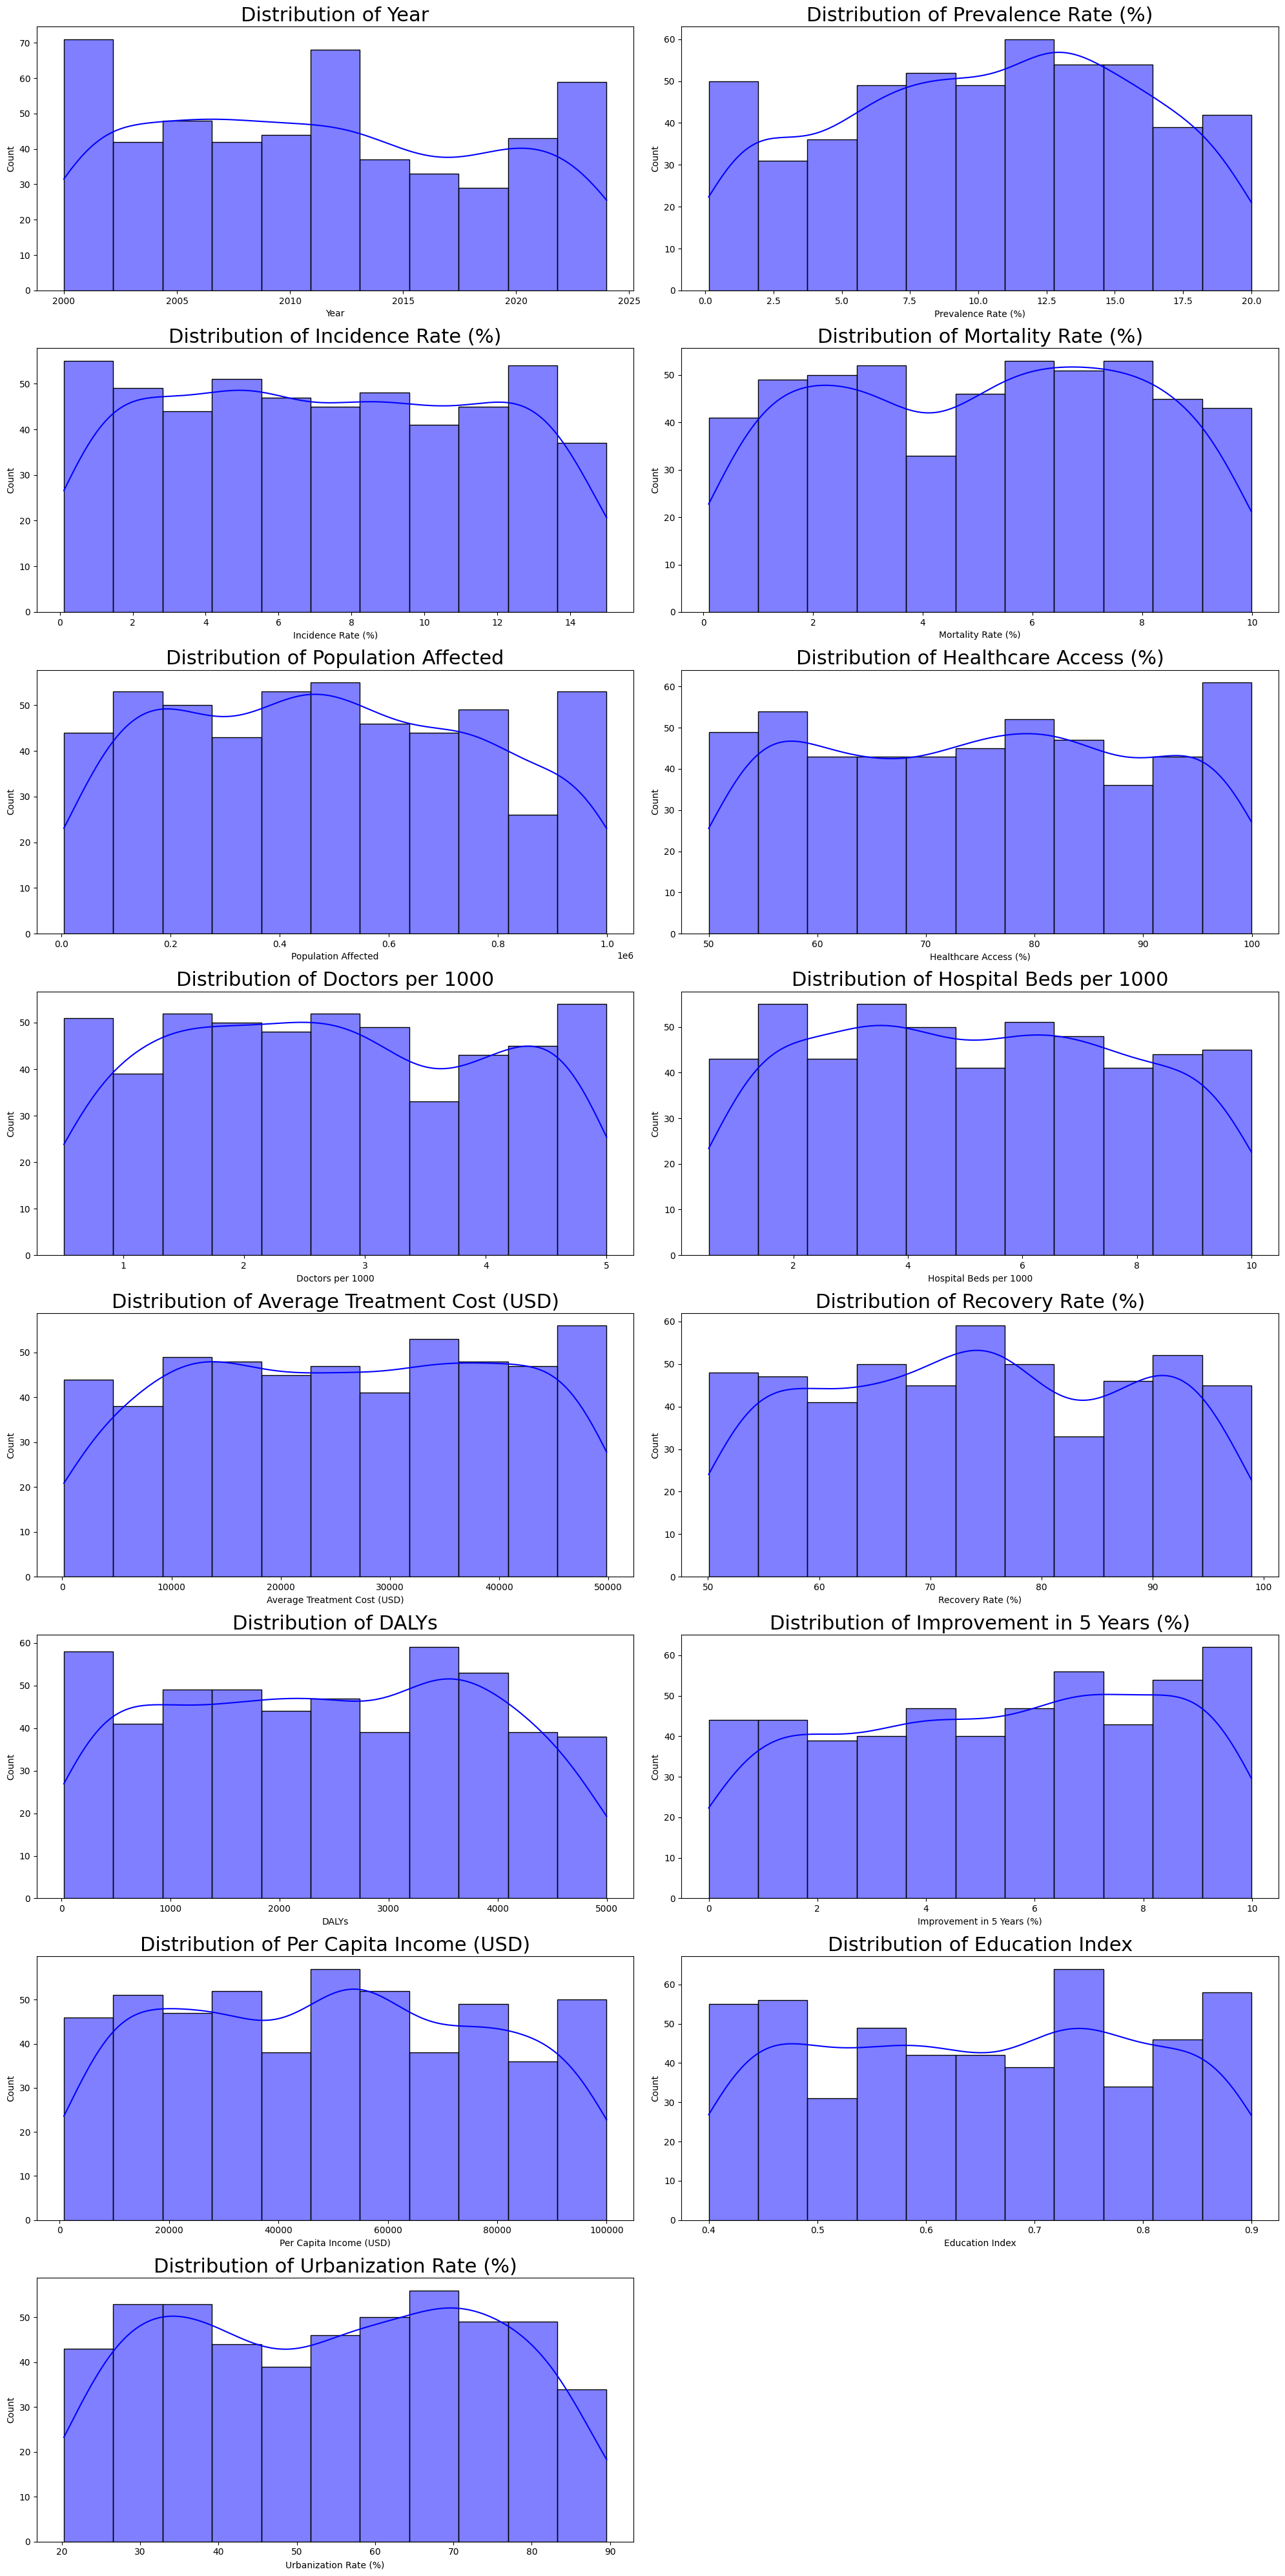

In [7]:
# Histograms in subplots
cols = 2
rows = math.ceil(len(numeric_cols) / cols)
plt.figure(figsize=(20, rows * 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col].dropna(), kde=True, color='blue')
    plt.title(f"Distribution of {col}", fontsize=22)
plt.tight_layout()


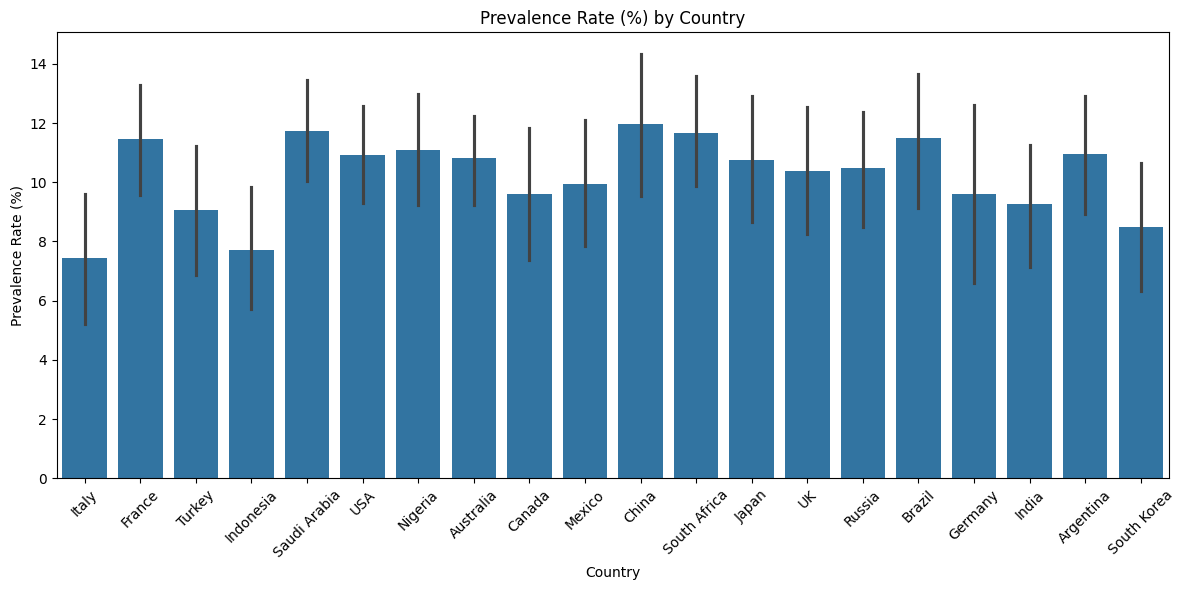

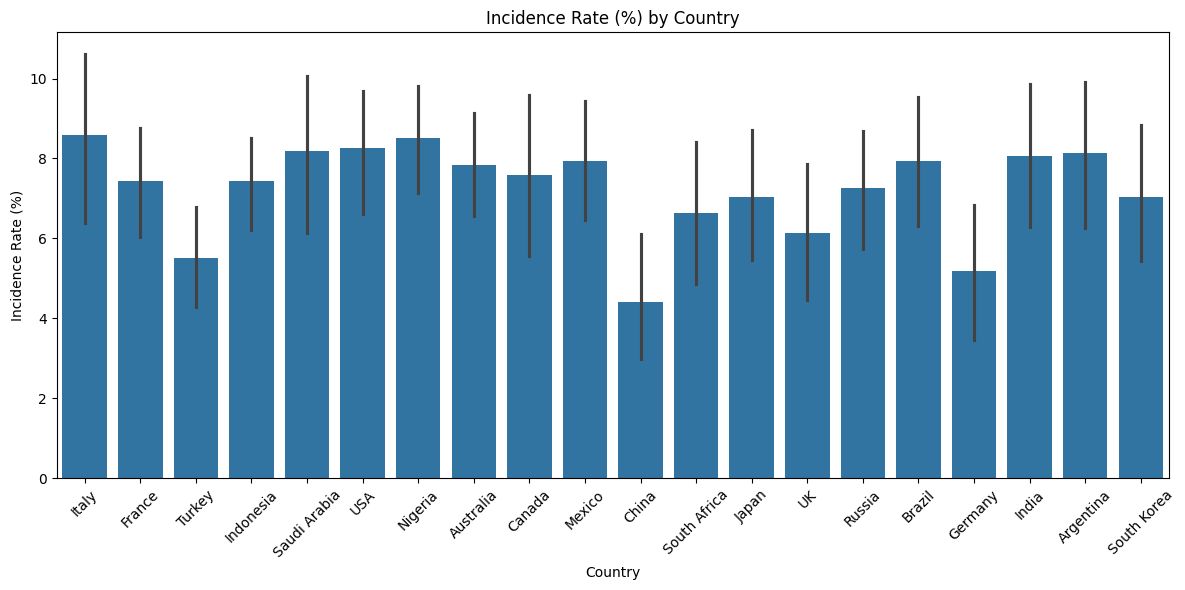

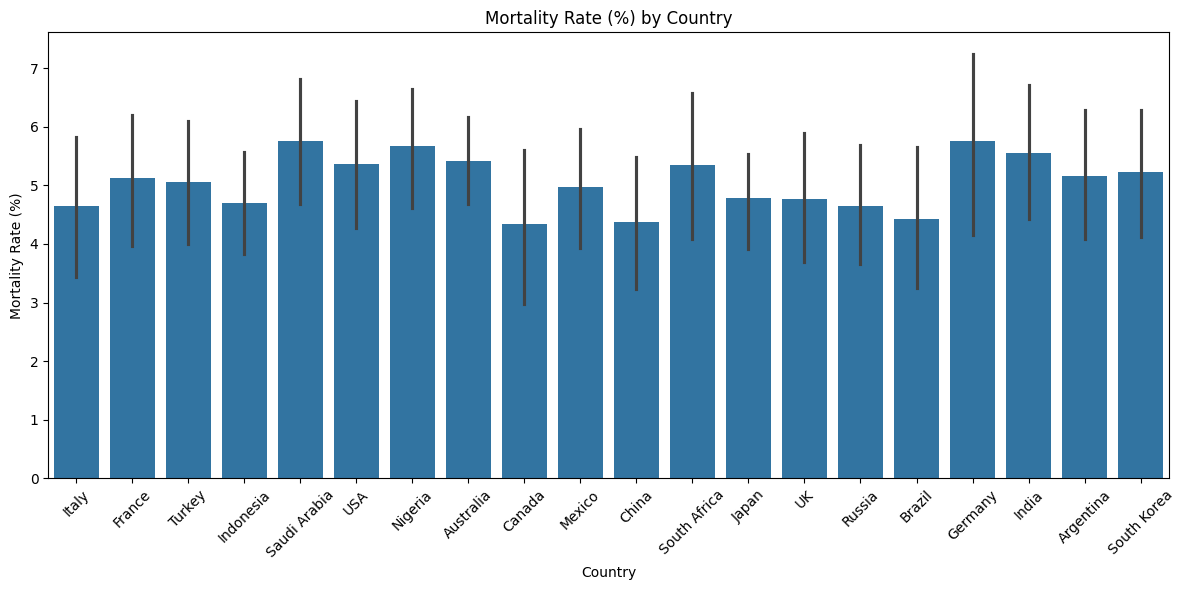

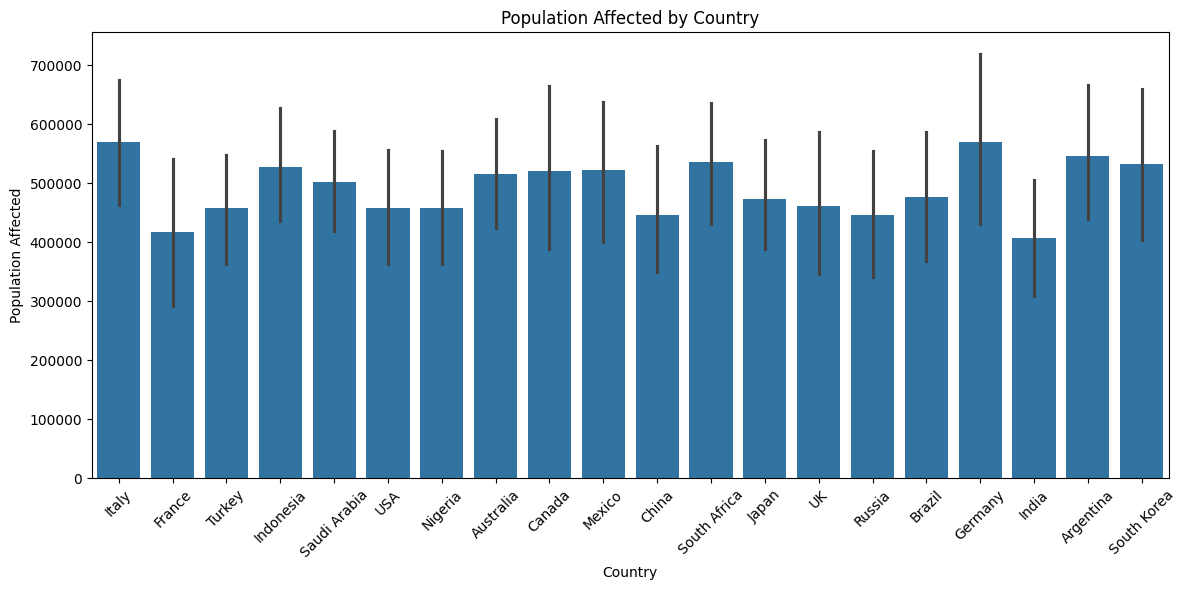

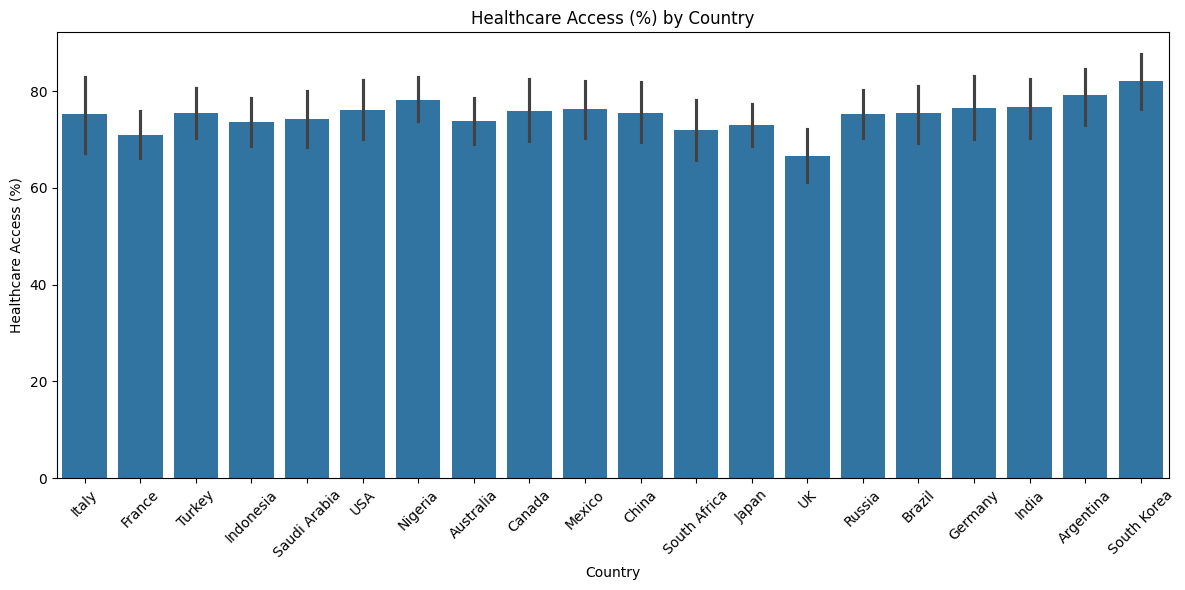

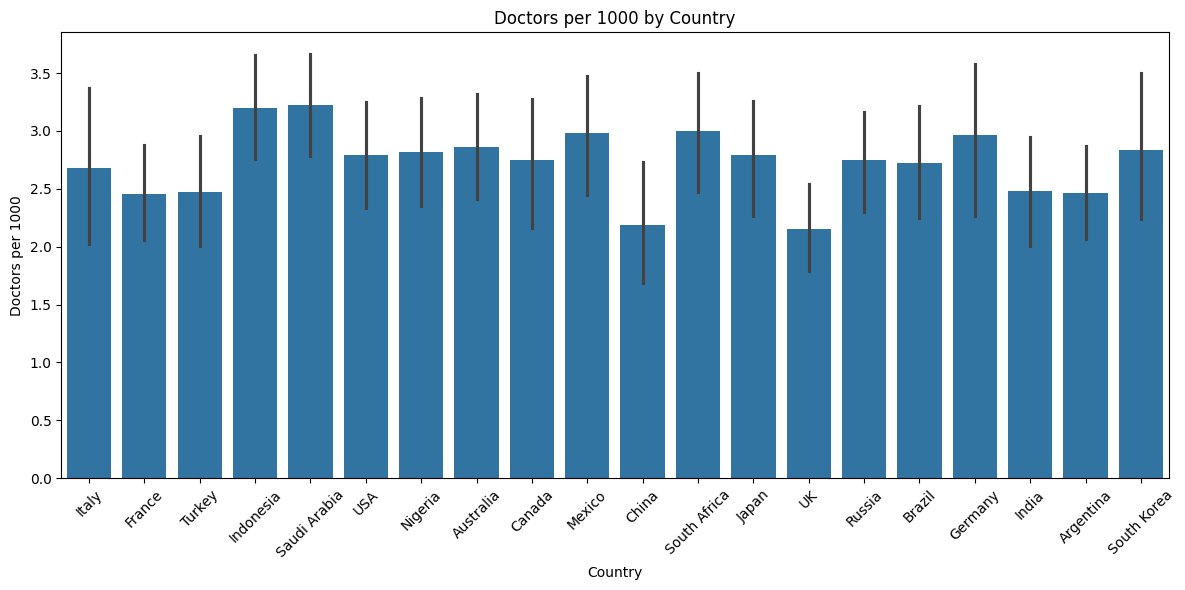

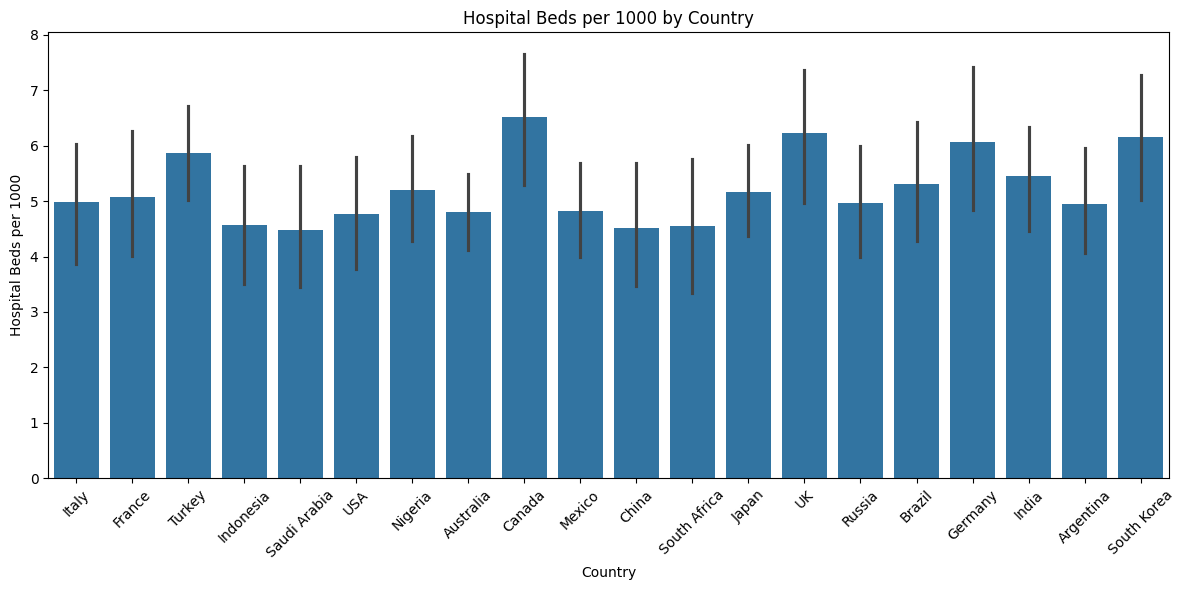

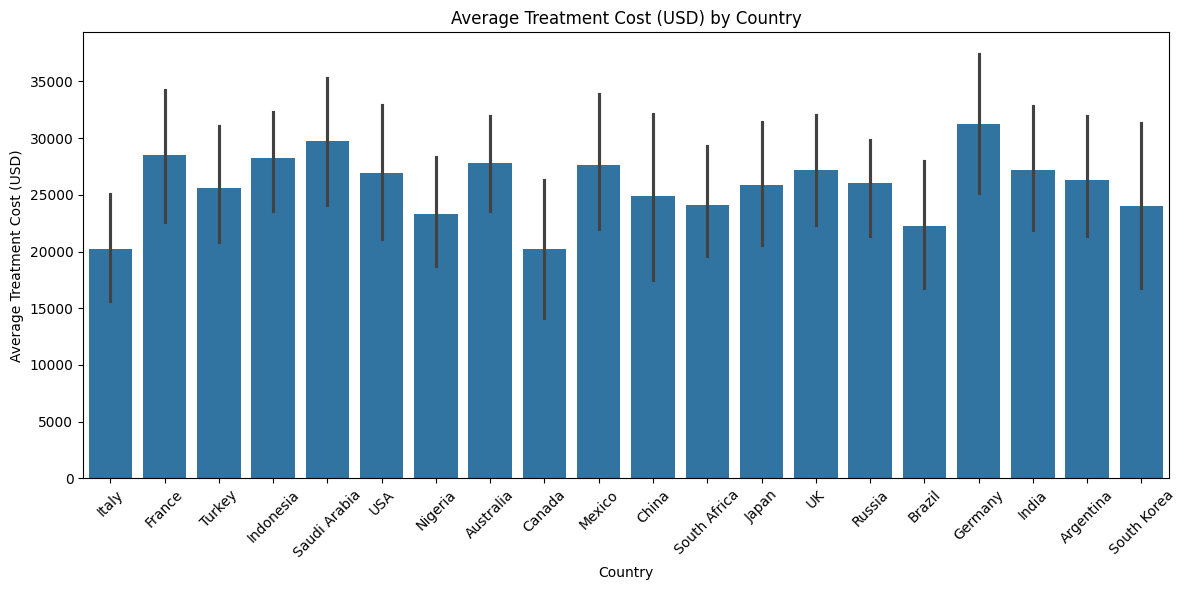

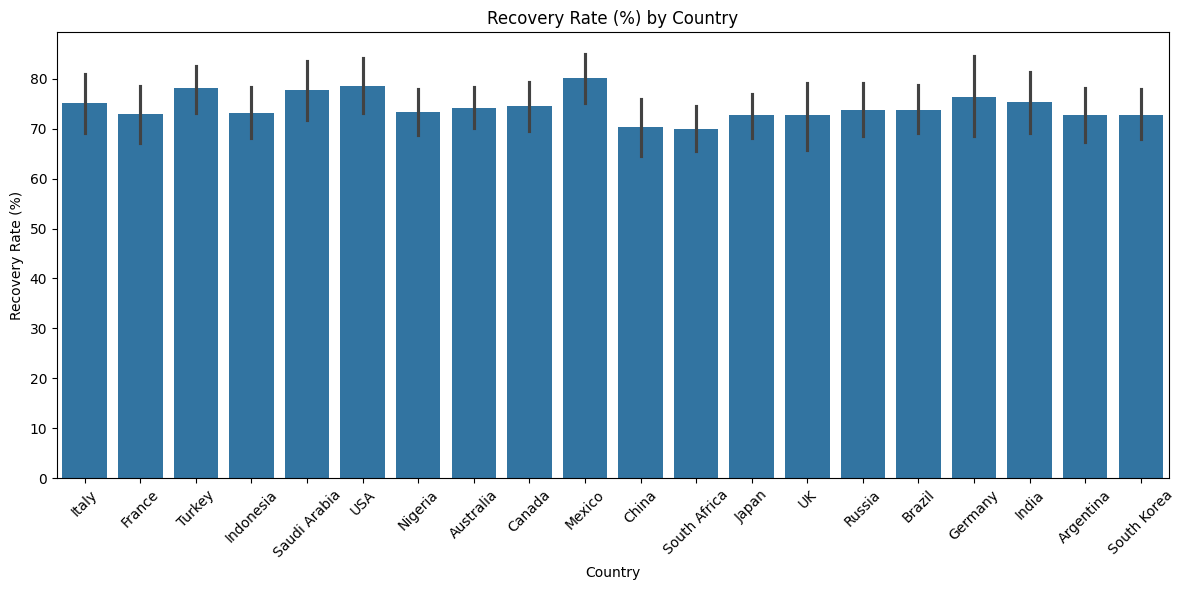

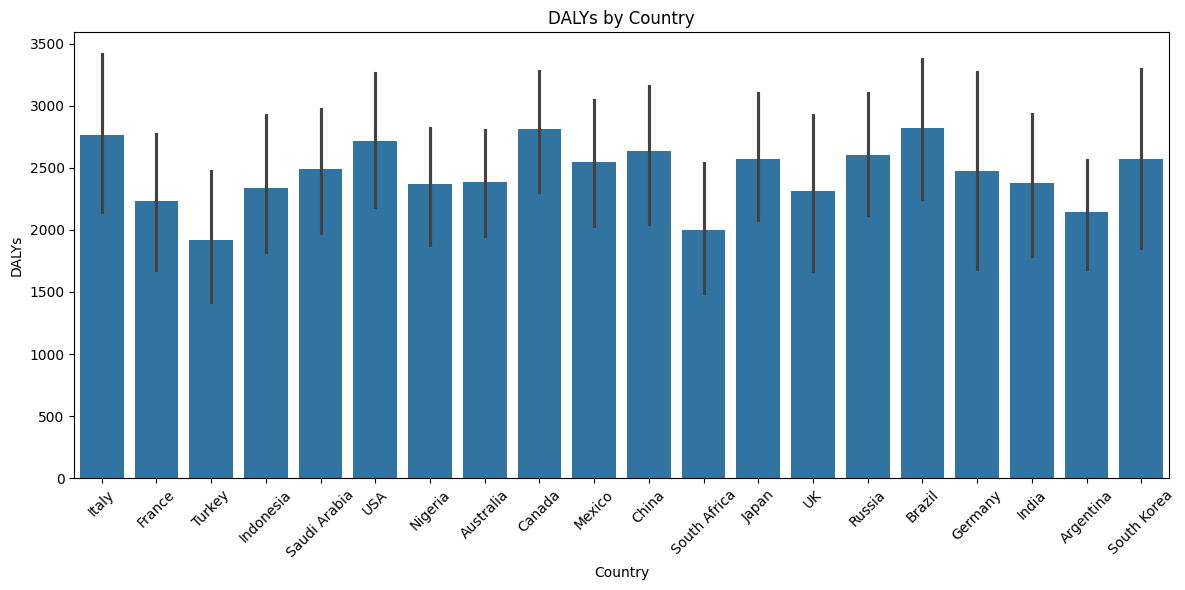

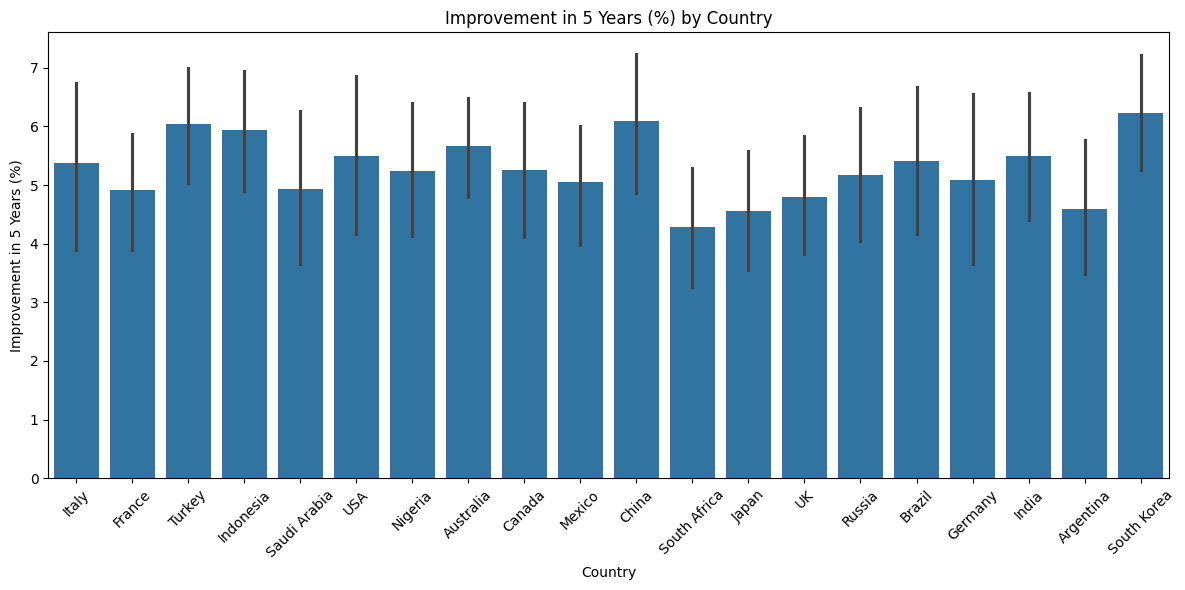

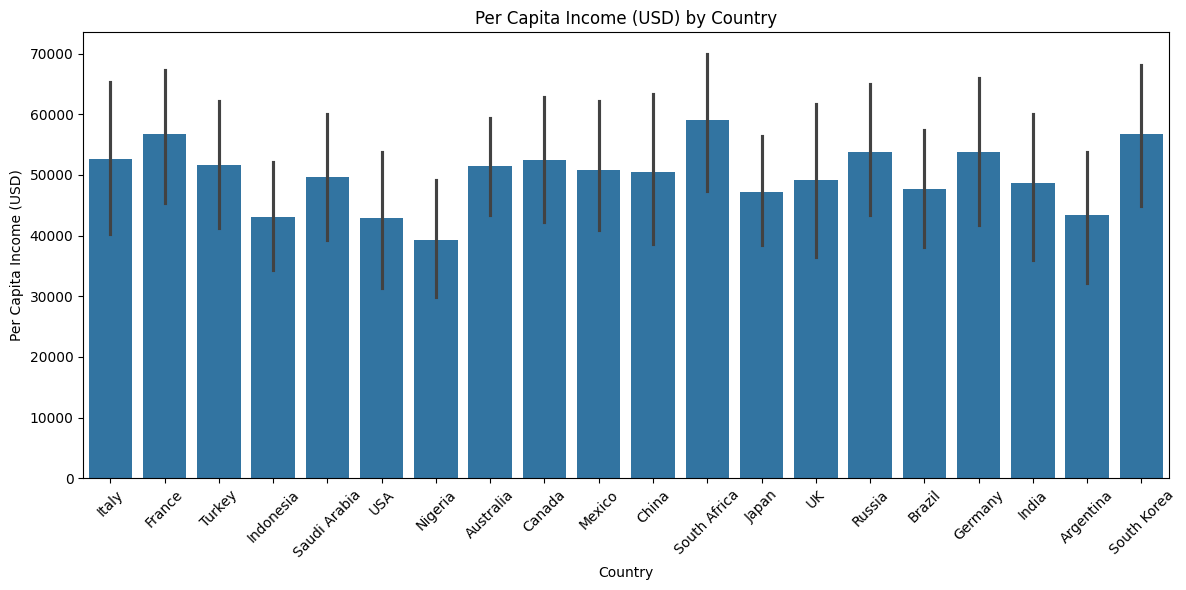

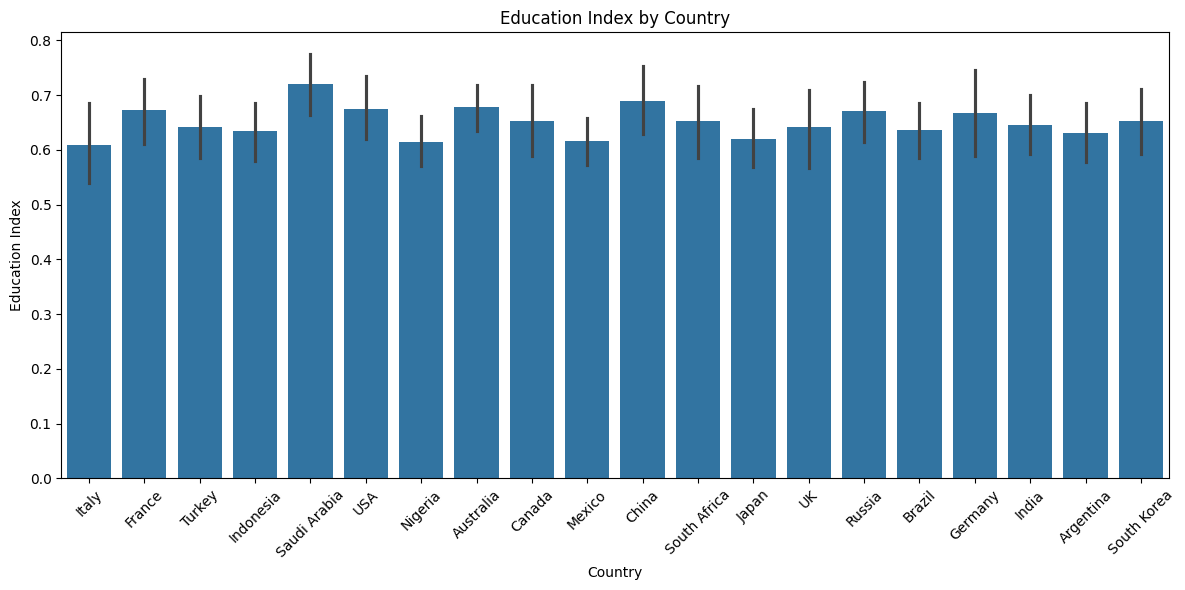

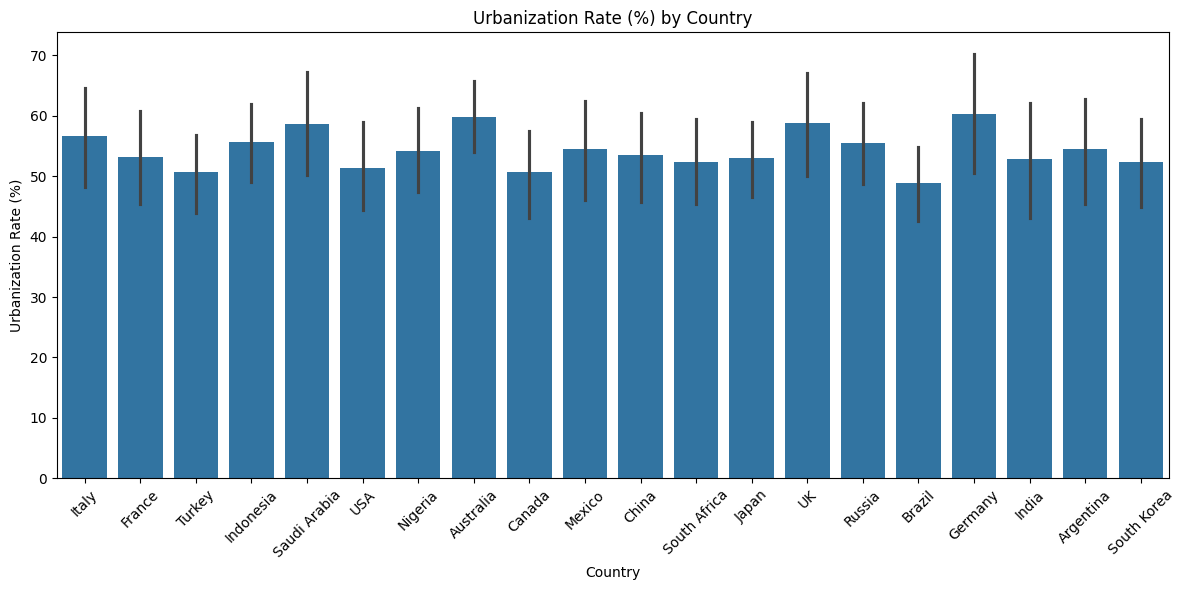

In [8]:
# Remove columns that don't make sense for direct bar plotting (optional)
numeric_col = [col for col in numeric_cols if col not in ['Year']]

# Plot all numeric columns with Country on x-axis
for col in numeric_col:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Country', y=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} by Country")
    plt.xlabel("Country")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [9]:
import os

# Create a folder to store plots
os.makedirs("plots", exist_ok=True)

for col in numeric_col:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Country', y=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} by Country")
    plt.xlabel("Country")
    plt.ylabel(col)
    plt.tight_layout()

    # Save the figure
    plt.savefig(f"plots/{col}_by_Country.png", dpi=300)  # high resolution
    
    plt.close()  # Close the figure to save memory


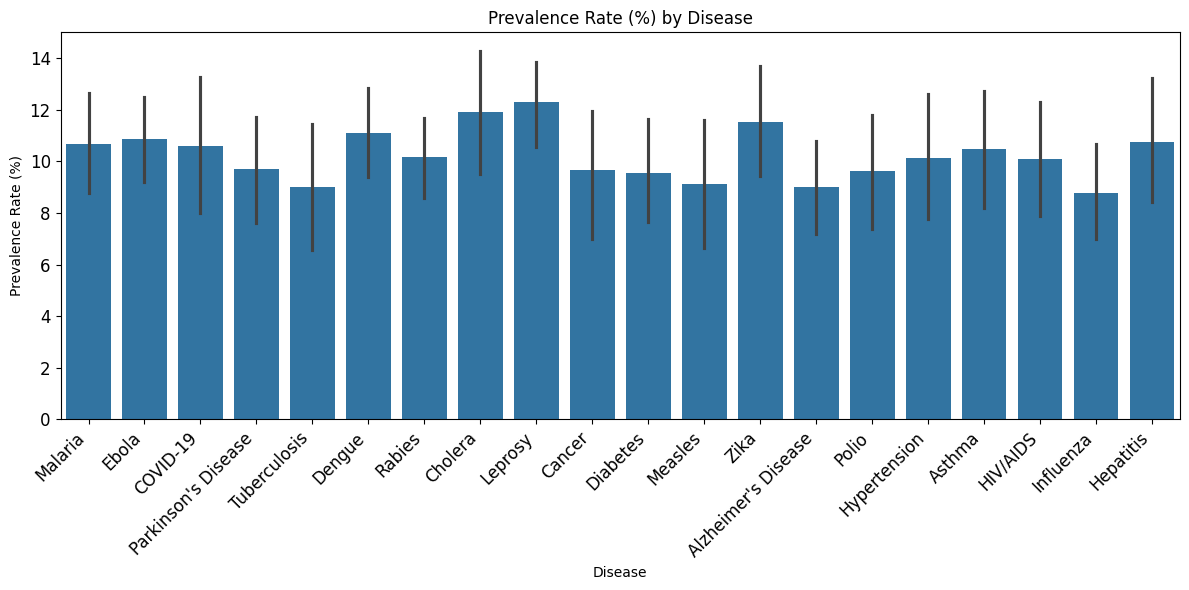

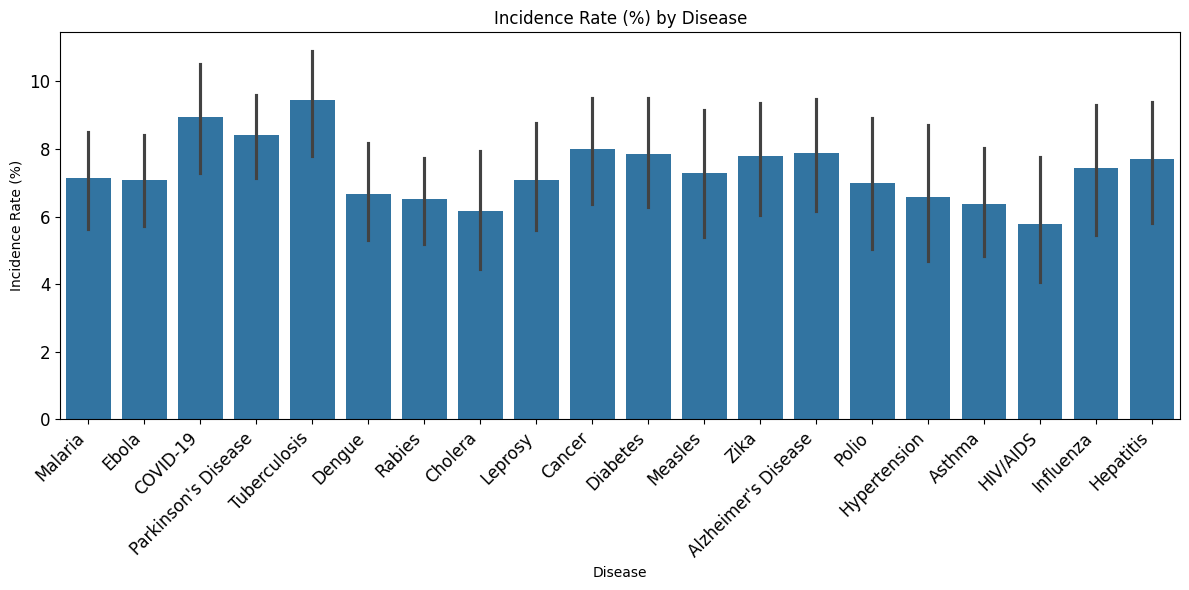

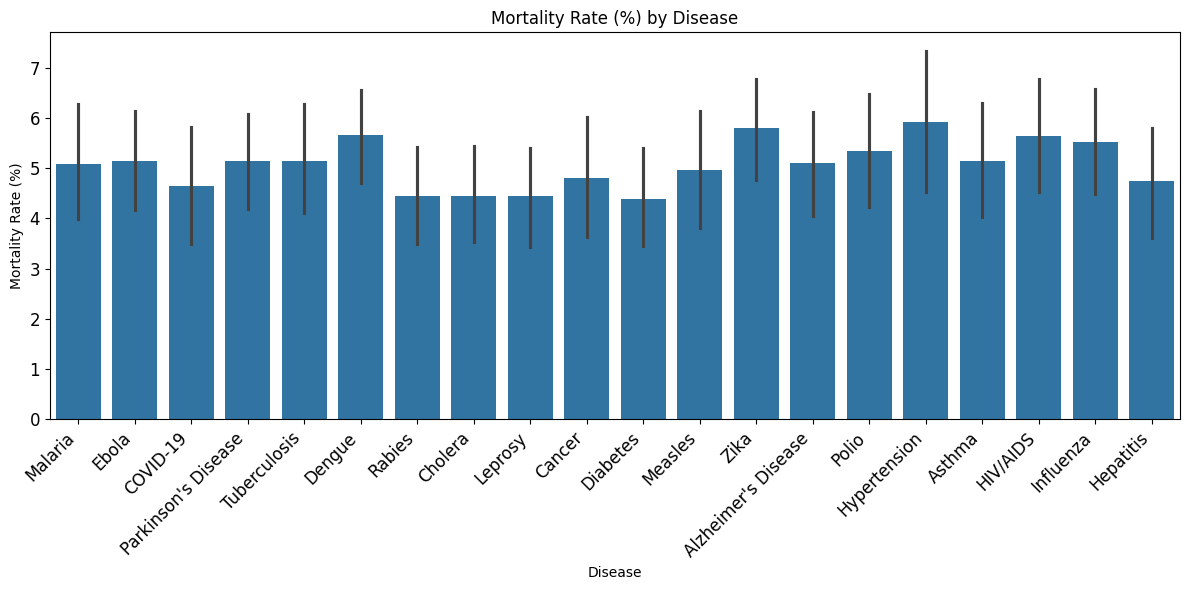

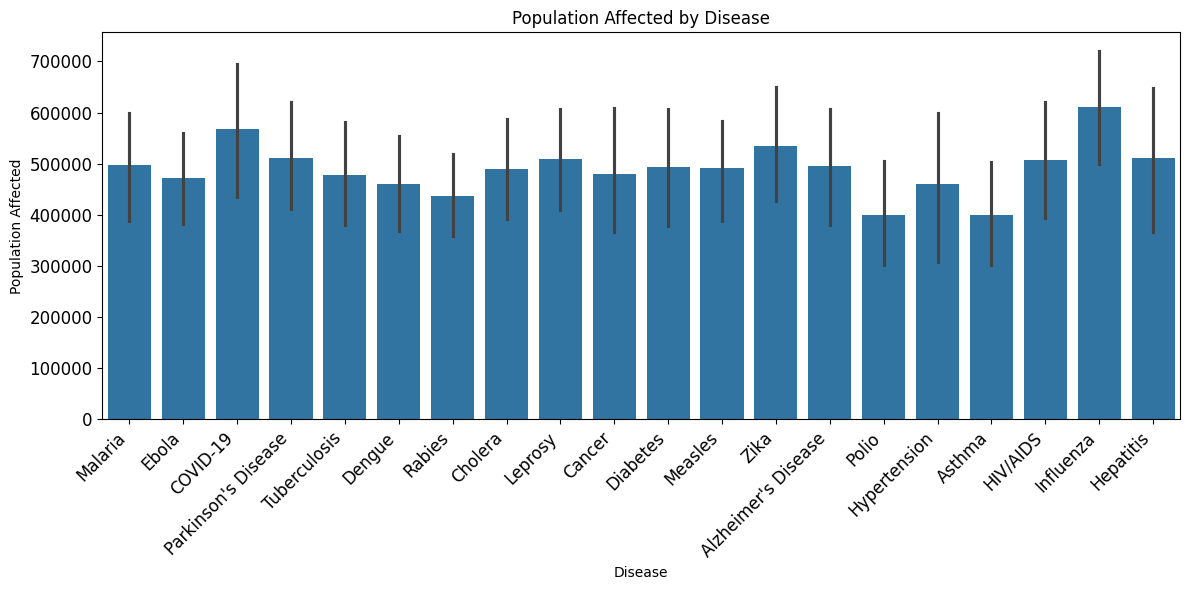

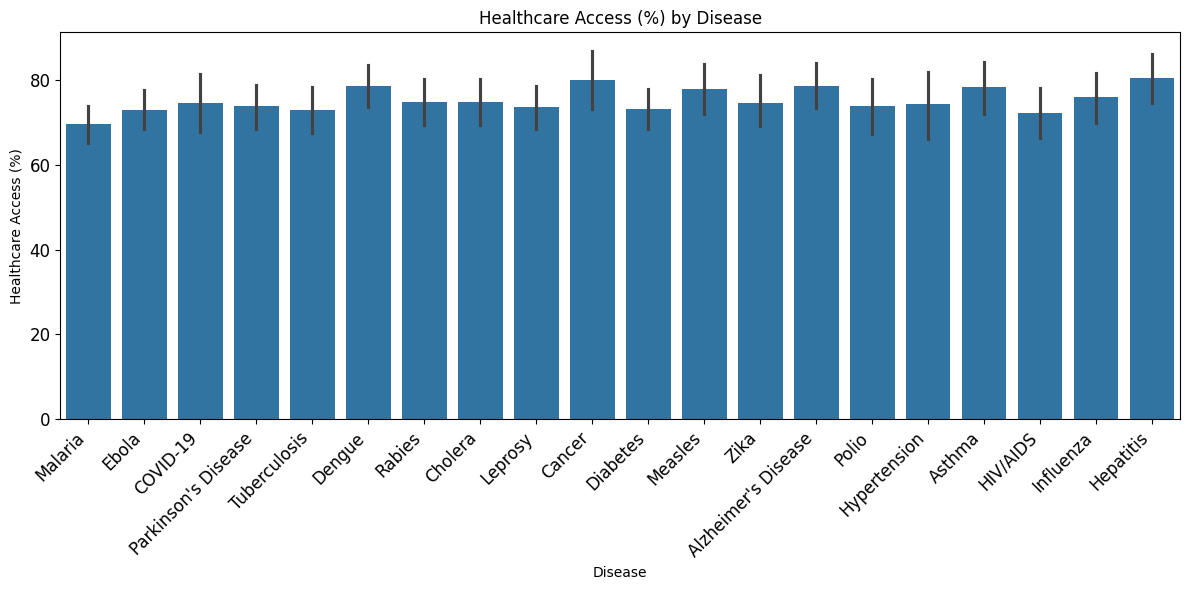

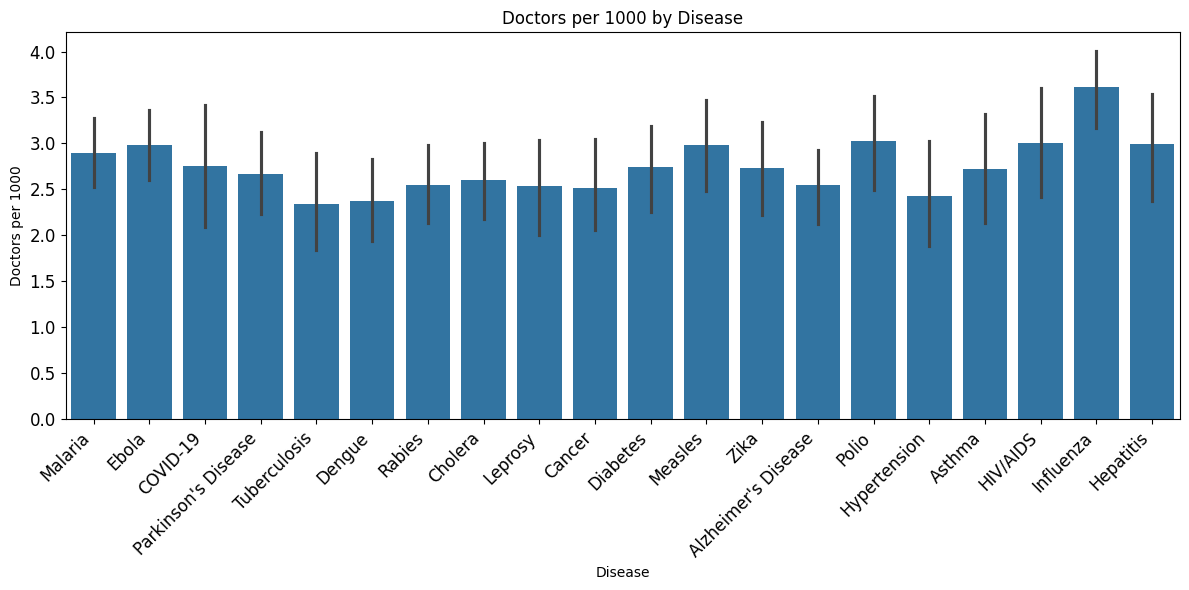

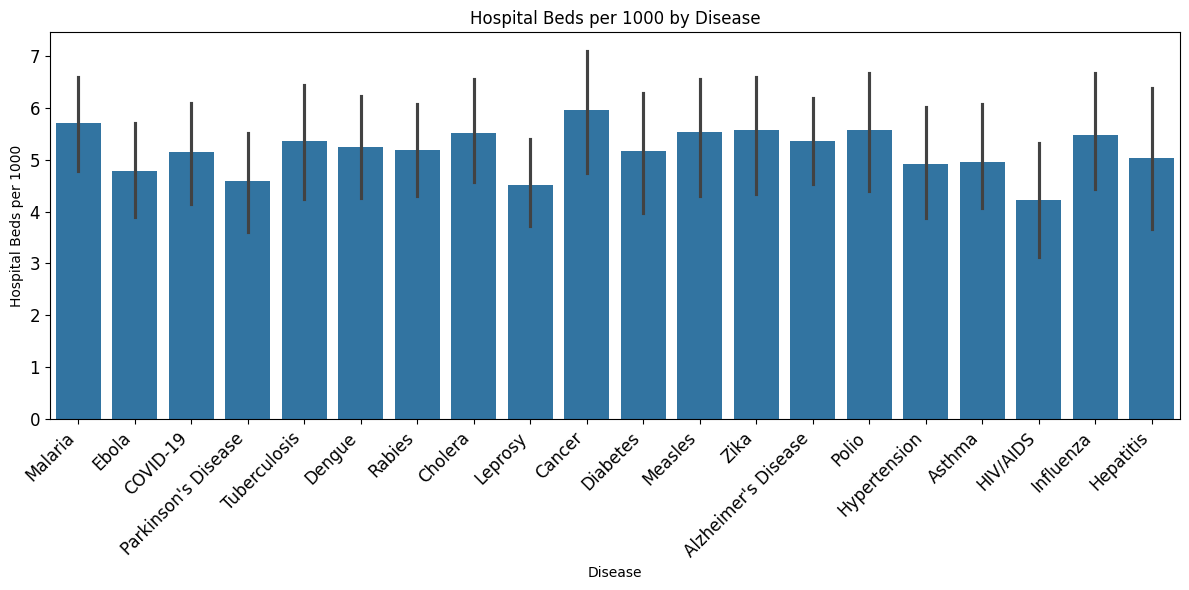

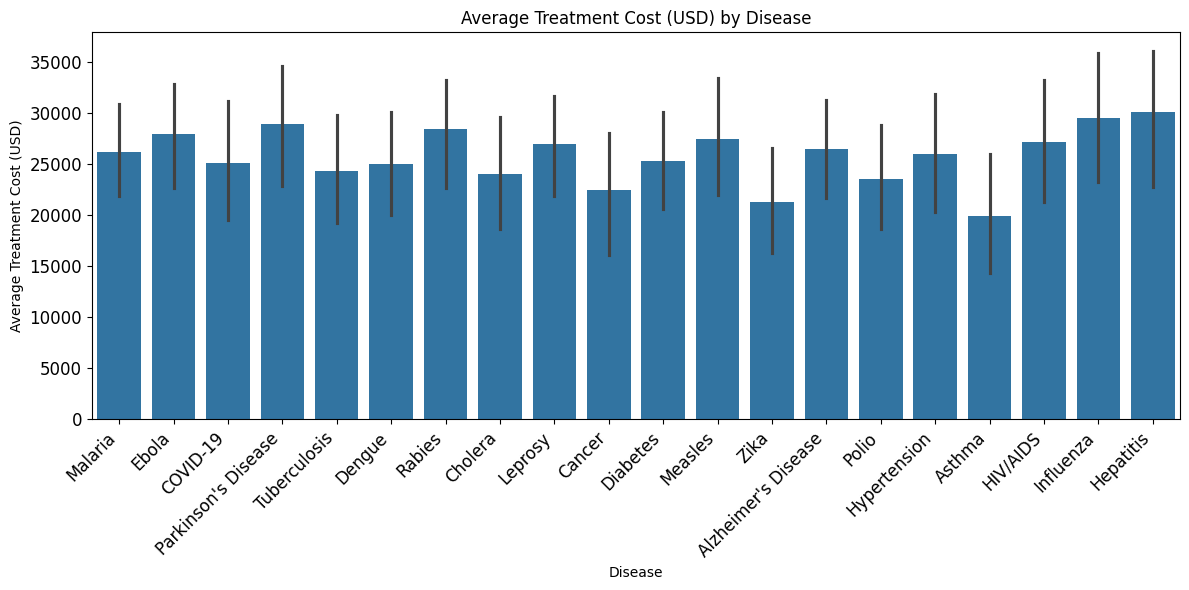

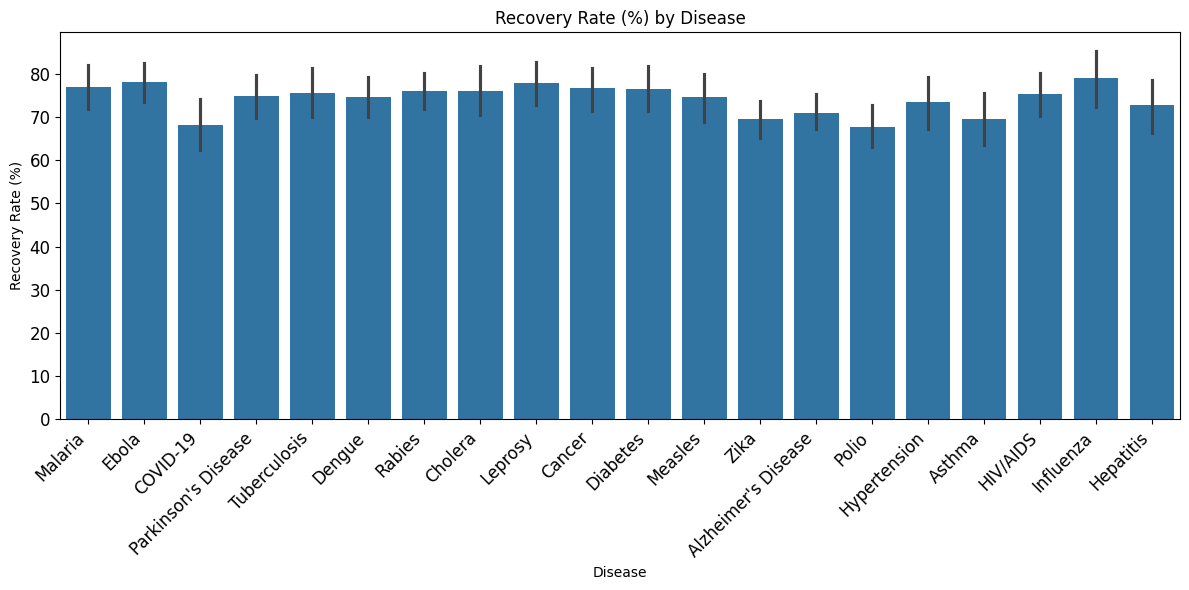

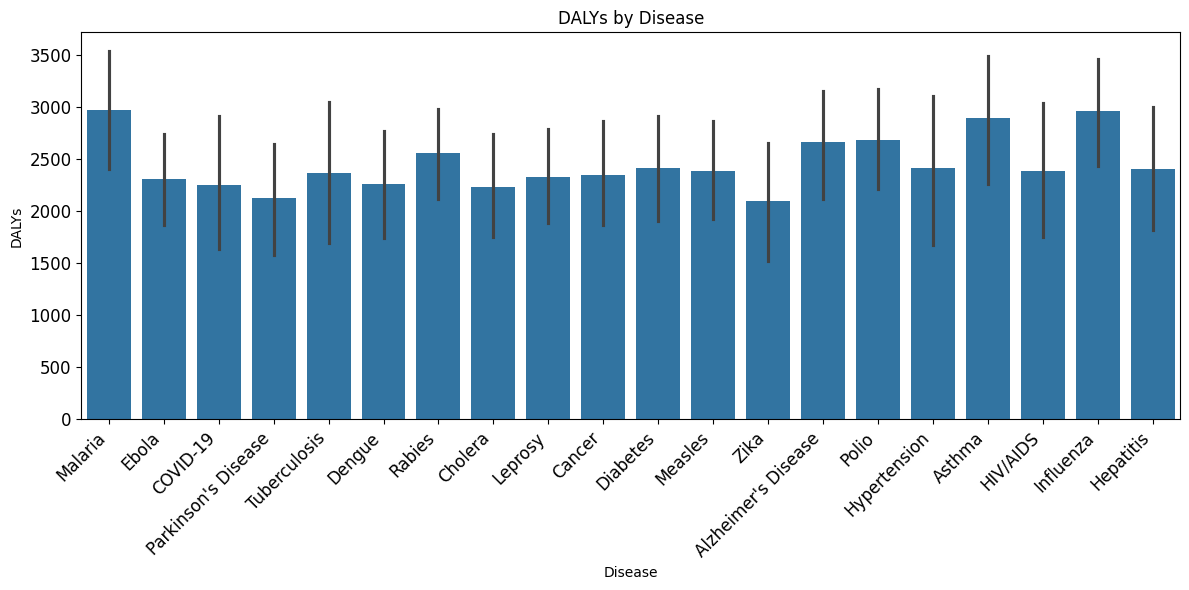

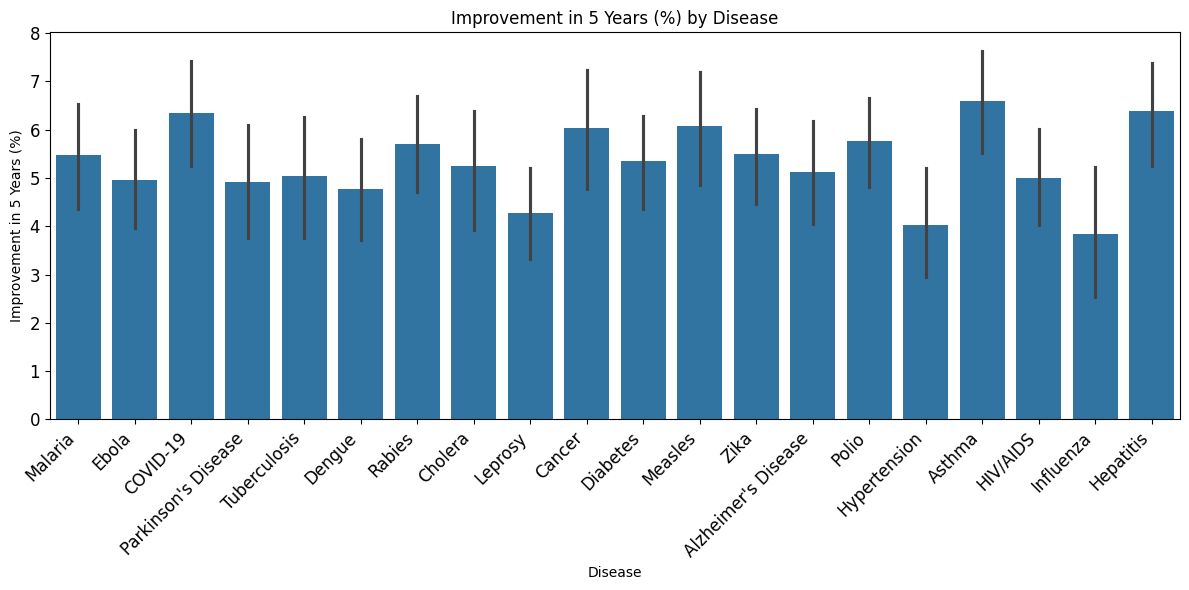

In [10]:
# Remove columns that don't make sense for direct bar plotting (optional)
numeric_col = [col for col in numeric_cols if col not in ['Year', 'Per Capita Income (USD)',
 'Education Index', 'Urbanization Rate (%)']]

# Plot all numeric columns with Disese Name on x-axis
for col in numeric_col:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Disease Name', y=col, data=df)
    plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
    plt.yticks(fontsize=12) 
    plt.title(f"{col} by Disease")
    plt.xlabel("Disease")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [11]:
import os

# Create a folder to store plots
os.makedirs("plots", exist_ok=True)

for col in numeric_col:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Disease Name', y=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} by Disease")
    plt.xlabel("Disease")
    plt.ylabel(col)
    plt.tight_layout()

    # Save the figure
    plt.savefig(f"plots/{col}_by_Disease.png", dpi=300)  # high resolution
    
    plt.close()  # Close the figure to save memory


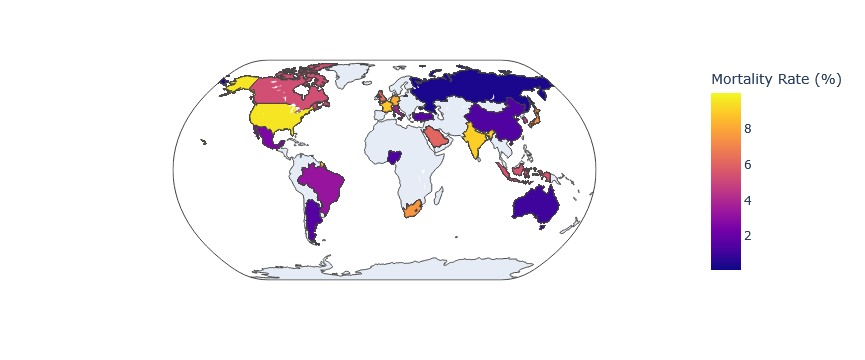

In [19]:
##Maps & Geo Plots

##Maps & Geo Plots

# df = px.data.gapminder().query("year == 2007")
fig = px.choropleth(df, 
                    locations="Country", 
                    locationmode="country names", 
                    color="Mortality Rate (%)",
                    hover_name="Country", 
                    projection="natural earth")
fig.show()


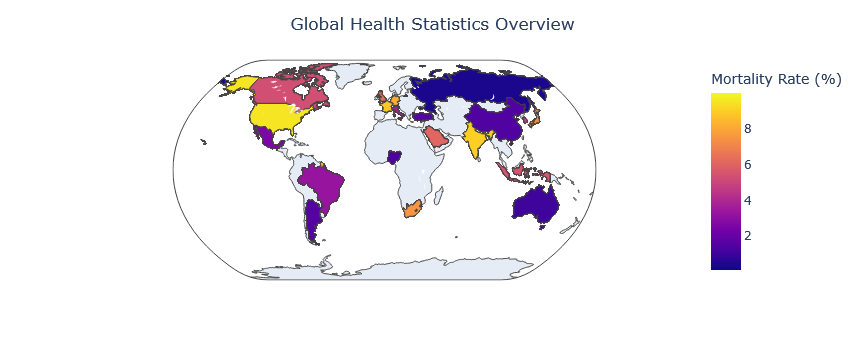

In [18]:
# Create choropleth with multiple hover data fields
fig = px.choropleth(
    df, 
    locations="Country", 
    locationmode="country names", 
    color="Mortality Rate (%)",  # This controls the map color
    hover_name="Country", 
    hover_data={
        "Mortality Rate (%)": True,
        "Prevalence Rate (%)": True,
        "Incidence Rate (%)": True,
        "Recovery Rate (%)": True,
        "DALYs": True,
        "Per Capita Income (USD)": True,
        "Healthcare Access (%)": True
    },
    projection="natural earth"
)

fig.update_layout(
    title="Global Health Statistics Overview",
    title_x=0.5
)

fig.show()
 

In [12]:
df.columns

Index(['Country', 'Year', 'Disease Name', 'Disease Category',
       'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)',
       'Age Group', 'Gender', 'Population Affected', 'Healthcare Access (%)',
       'Doctors per 1000', 'Hospital Beds per 1000', 'Treatment Type',
       'Average Treatment Cost (USD)', 'Availability of Vaccines/Treatment',
       'Recovery Rate (%)', 'DALYs', 'Improvement in 5 Years (%)',
       'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)'],
      dtype='object')

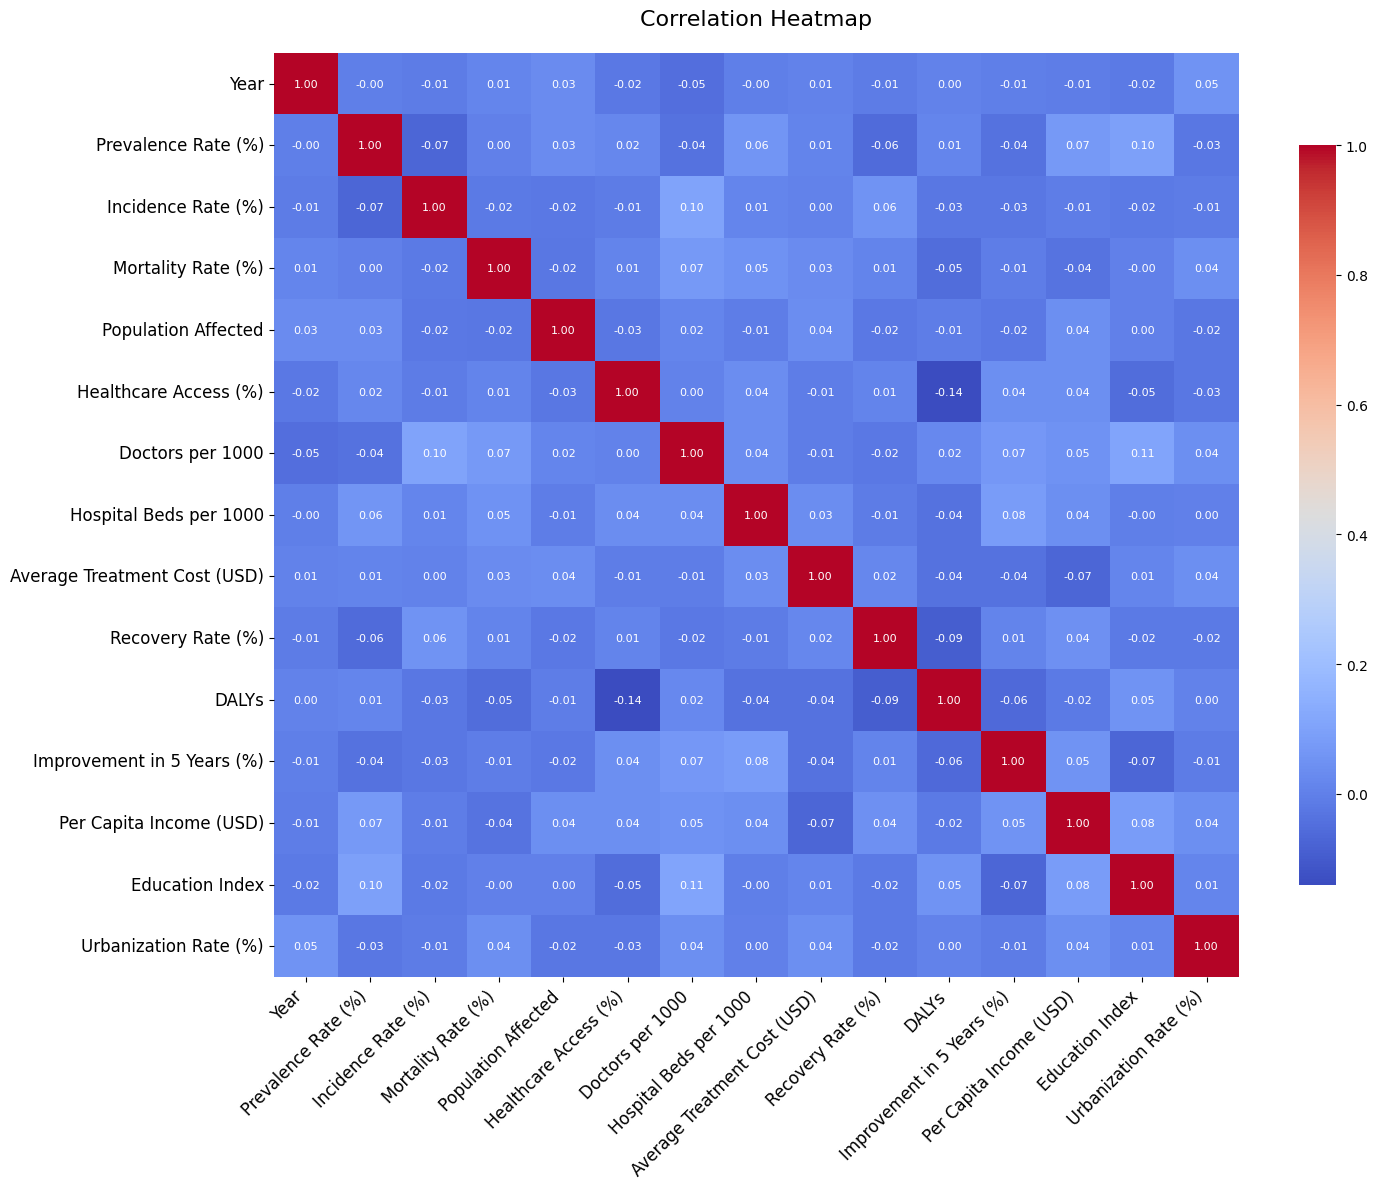

In [13]:
plt.figure(figsize=(15, 12))  # Make the plot bigger
corr = df.corr(numeric_only=True)

sns.heatmap(
    corr, 
    annot=True,           # Show correlation values
    fmt=".2f",             # Format numbers
    cmap="coolwarm",       # Color scheme
    annot_kws={"size": 8}, # Smaller font size for numbers
    cbar_kws={'shrink': 0.8}  # Shrink color bar
)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)                           # Adjust y-axis label size
plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## Comment: 
There are no relations or very poor relations among variables in the Dataset.

## ------------------ INFERENTIAL ANALYSIS ------------------

In [14]:
numeric_cols

['Year',
 'Prevalence Rate (%)',
 'Incidence Rate (%)',
 'Mortality Rate (%)',
 'Population Affected',
 'Healthcare Access (%)',
 'Doctors per 1000',
 'Hospital Beds per 1000',
 'Average Treatment Cost (USD)',
 'Recovery Rate (%)',
 'DALYs',
 'Improvement in 5 Years (%)',
 'Per Capita Income (USD)',
 'Education Index',
 'Urbanization Rate (%)']

In [15]:
# Pick first numeric column as target (can be changed)
target = numeric_cols[3]
features = [col for col in numeric_cols if col not in ['Year', 'Mortality Rate (%)']]


In [16]:
target

'Mortality Rate (%)'

In [17]:
features

['Prevalence Rate (%)',
 'Incidence Rate (%)',
 'Population Affected',
 'Healthcare Access (%)',
 'Doctors per 1000',
 'Hospital Beds per 1000',
 'Average Treatment Cost (USD)',
 'Recovery Rate (%)',
 'DALYs',
 'Improvement in 5 Years (%)',
 'Per Capita Income (USD)',
 'Education Index',
 'Urbanization Rate (%)']

In [18]:
# Pearson correlations with target
pearson_results = []
for col in features:
    corr, p = pearsonr(df[target].dropna(), df[col].dropna())
    pearson_results.append({"Feature": col, "Pearson_r": corr, "p_value": p})
pearson_df = pd.DataFrame(pearson_results)


In [19]:
# ANOVA for categorical columns with <= 10 unique values
anova_results = []
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
for col in cat_cols:
    if df[col].nunique() <= 10:
        groups = [df[df[col] == cat][target].dropna() for cat in df[col].unique()]
        if len(groups) > 1:
            f_stat, p_val = f_oneway(*groups)
            anova_results.append({"Categorical": col, "F_stat": f_stat, "p_value": p_val})
anova_df = pd.DataFrame(anova_results)
anova_df

,Categorical,F_stat,p_value
0,Age Group,1.708257,0.164320
1,Gender,0.789270,0.454727
2,Treatment Type,0.128791,0.942996
3,Availability of Vaccines/Treatment,0.053252,0.817590


## Interpretation:

| Variable                           | F-statistic | p-value | Interpretation                                         |
| ---------------------------------- | ----------- | ------- | ------------------------------------------------------ |
| Age Group                          | 1.71        | 0.164   | No statistically significant difference between groups |
| Gender                             | 0.79        | 0.455   | No significant difference between genders              |
| Treatment Type                     | 0.13        | 0.943   | No significant difference between treatment types      |
| Availability of Vaccines/Treatment | 0.05        | 0.818   | No significant difference depending on availability    |


## Key point:
Since p > 0.05 for all, We fail to reject the null hypothesis in each case → there’s no evidence that these categorical variables have a measurable effect on the dependent variable in this dataset.

In [32]:
y = df['Mortality Rate (%)']
X = df[['Prevalence Rate (%)',
 'Incidence Rate (%)',
 'Population Affected',
 'Healthcare Access (%)',
 'Doctors per 1000',
 'Hospital Beds per 1000',
 'Average Treatment Cost (USD)',
 'Recovery Rate (%)',
 'DALYs',
 'Improvement in 5 Years (%)',
 'Per Capita Income (USD)',
 'Education Index',
 'Urbanization Rate (%)']]

In [33]:
y.shape

(516,)

In [34]:
X.shape

(516, 13)

In [35]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#  Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predictions & evaluation
y_predictions = model.predict(X_test)
print("R²:", r2_score(y_test, y_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predictions)))

R²: -0.08143364065665382
RMSE: 2.703043770124985


1. R² (Coefficient of Determination) = -0.0814

R² measures how well the model explains variance in the target variable.

An R² < 0 means this model performs worse than just predicting the mean of the target for all observations. In other words, it’s not capturing useful patterns from the data.

2. RMSE (Root Mean Squared Error) = 2.7030 indicates that the average magnitude of prediction errors are less.

RMSE measures the average magnitude of prediction errors (in the same units as target).

Lower RMSE is better, but without context about target variable’s scale, it’s hard to judge.

Interpretation:
Your model is underfitting — it’s not learning useful relationships from the predictors.

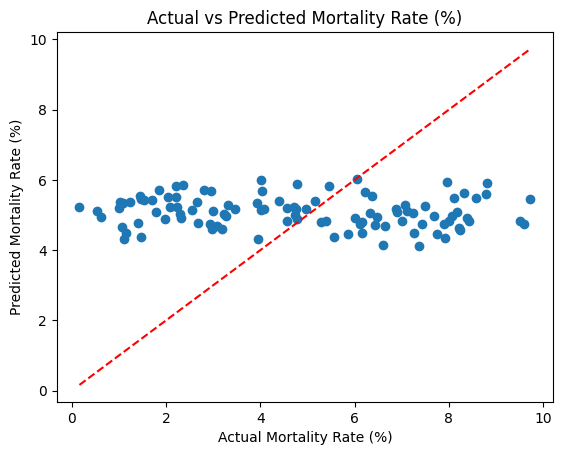

In [37]:
plt.scatter(y_test, y_predictions)
plt.xlabel("Actual Mortality Rate (%)")
plt.ylabel("Predicted Mortality Rate (%)")
plt.title("Actual vs Predicted Mortality Rate (%)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

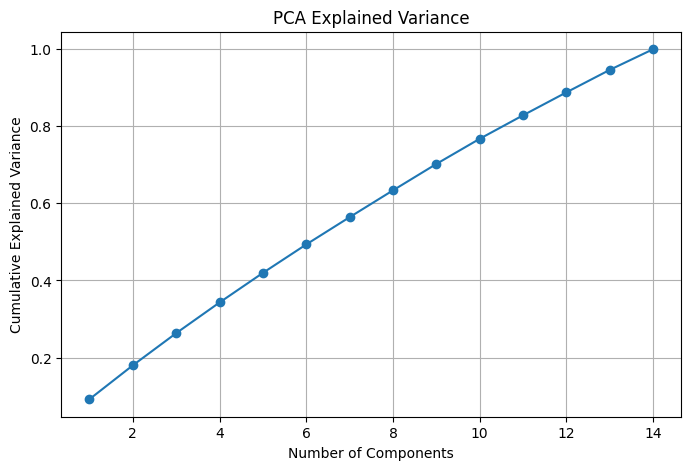

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



{'n_components': 1,
 'R2': 7.489597447773999e-05,
 'RMSE': 19.623943856844857,
 'MAE': 17.118132708196523}

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt


# Drop non-numeric columns for PCA
numeric_df = df.select_dtypes(include=[np.number]).dropna()

# Separate features and target
X = numeric_df.drop(columns=numeric_df.columns[-1])  # last column as target
y = numeric_df.iloc[:, -1]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA explained variance plot
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# Cross-validation to find optimal number of components
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for n in range(1, X.shape[1] + 1):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    model = LinearRegression()
    scores = cross_val_score(model, X_pca, y, cv=kf, scoring='r2')
    results.append((n, scores.mean()))

# Find best n_components
best_n, best_r2 = max(results, key=lambda x: x[1])

# Train final model
pca = PCA(n_components=best_n)
X_pca = pca.fit_transform(X_scaled)
model = LinearRegression()
model.fit(X_pca, y)
y_pred = model.predict(X_pca)

final_metrics = {
    'n_components': best_n,
    'R2': r2_score(y, y_pred),
    'RMSE': mean_squared_error(y, y_pred, squared=False),
    'MAE': mean_absolute_error(y, y_pred)
}

final_metrics


## Overall Interpretation:

Severe underfitting — with only 1 component, the model has thrown away too much information.

R² being ~0 means we haven’t captured useful patterns.

Large RMSE and MAE compared to expected target range suggest poor predictive accuracy.